**Description of Data:**
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Import the dataset
haberman = pd.read_csv('./haberman.csv');

In [3]:
haberman.head()

,Age,Op_Year,axil_nodes_det,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


***Since Survival Status as 1 or 2 does not depict clearly about status of survival of the patient, change it to more meaningful like 'Yes' for survived and 'No' for not survived***

In [4]:
haberman['Surv_status'] = haberman['Surv_status'].map({1:'yes', 2:'no'})

In [5]:
haberman.head()

,Age,Op_Year,axil_nodes_det,Surv_status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [6]:
# Number of points in the dataset
haberman.shape

(306, 4)

1. So, there are 306 data points/entries and 4 features in the dataset.

In [7]:
# Columns in the dataset
haberman.columns

Index(['Age', 'Op_Year', 'axil_nodes_det', 'Surv_status'], dtype='object')

In [8]:
# Check data points in each feature in the dataset. Basically this also gives intuition about null values in the dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age               306 non-null int64
Op_Year           306 non-null int64
axil_nodes_det    306 non-null int64
Surv_status       306 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


In [9]:
# Labels/Class in the dataset
haberman['Surv_status'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
# Number of data points in each class
haberman['Surv_status'].value_counts()

yes    225
no      81
Name: Surv_status, dtype: int64

In [11]:
# Summarise the numerical features
haberman.describe()

,Age,Op_Year,axil_nodes_det
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Observation**
1. Among the people who undergo surgery, 50%  were under the age of 52.
2. In 75% of the patients, the axiliary nodes detected were around 4.
3. 50% of the patients undergo the breast cancer surgery on or before the year 1963.

### Univariate Analysis

c:\users\shashank\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


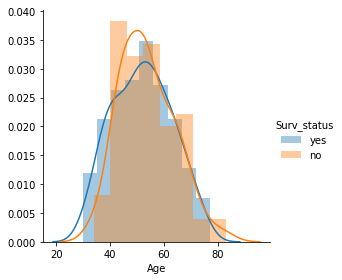

In [12]:
# Analyze survival based on each feature in the dataset using FacetGrid plot
sns.FacetGrid(haberman, hue='Surv_status', height=4).map(sns.distplot, 'Age').add_legend()
plt.show()

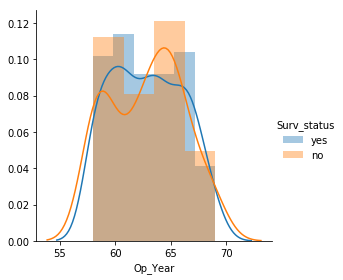

In [13]:
sns.FacetGrid(haberman, hue='Surv_status', height=4).map(sns.distplot, 'Op_Year').add_legend()
plt.show()

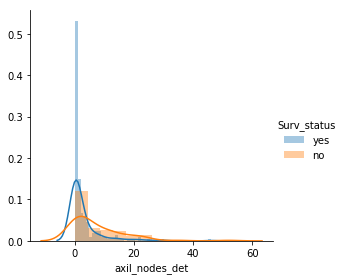

In [14]:
sns.FacetGrid(haberman, hue='Surv_status', height=4).map(sns.distplot, 'axil_nodes_det').add_legend()
plt.show()

**Observation**
1. Among all the features 'axil_nodes_det' grades better for classifying better about the survival of the patients.

In [15]:
# modifying the dataset based on the label
survived = haberman.loc[haberman['Surv_status']=='yes']
not_survived = haberman.loc[haberman['Surv_status']=='no']

******************** Axil Nodes Detected ********************
PDF:  [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
CDF:  [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


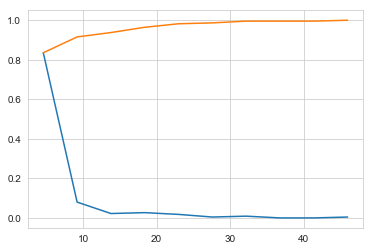

******************** Axil Nodes Detected ********************
PDF:  [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
CDF:  [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


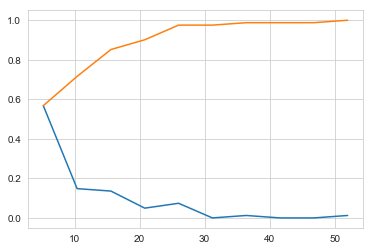

In [24]:
# PDF and CDF for Survived patients
#Age
count, bin_edges = np.histogram(survived['Age'], bins=10, density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print('*'*20,'Age','*'*20)
print('PDF: ',pdf)
print('CDF: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#Operated Year
count, bin_edges = np.histogram(survived['Op_Year'], bins=10, density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print('*'*20,'Operated Year','*'*20)
print('PDF: ',pdf)
print('CDF: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#Axil Nodes Detected
count, bin_edges = np.histogram(survived['axil_nodes_det'], bins=10, density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print('*'*20,'Axil Nodes Detected','*'*20)
print('PDF: ',pdf)
print('CDF: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#Axil Nodes Detected
count, bin_edges = np.histogram(nnot_survived['axil_nodes_det'], bins=10, density=True)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print('*'*20,'Axil Nodes Detected','*'*20)
print('PDF: ',pdf)
print('CDF: ',cdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

**Observation**
1. The blue line indicates PDF and orange line CDF.
2. About 70% of patients up or about 60 years of age survived post the surgery of cancer.
3. Among the entries in the dataset, 80-90% of patients who survived underwent surgery during 1966-67.
4. The auxiliary nodes detected in 80% of the patients were upto 5.
5. Also, among all the 'Age' features has most relevant/significant values. Thus, Age can supersede among all the features in classifying the survival of the patients.

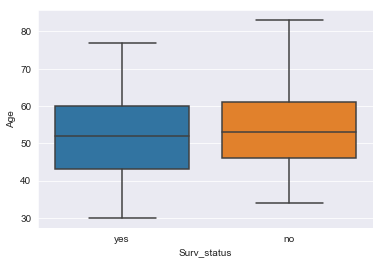

In [17]:
# Box plot
sns.set_style('darkgrid')
sns.boxplot(x='Surv_status', y='Age', data=haberman)
plt.show()

**Observation**
1. 50% of patients aged about 52 years survived post surgery.
2. 75% of patients aged 60 years, couldn't survive after surgery. 

[]

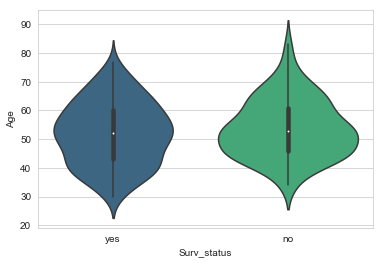

In [18]:
#Violin plot
#Combination of box plot and pdf
sns.set_style('whitegrid')
sns.violinplot(x = 'Surv_status', y='Age', data=haberman, palette='viridis')
plt.plot()

**Observation**
1. Most of the patients between 45-55 years of age survived post surgery for cancer.
2. Most of the patients above 75-80 years of age couldn't survive post surgery. 

### Bivariate Analysis

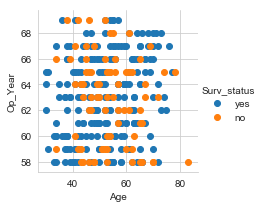

In [19]:
#Scatter plot
#plt.scatter(x=haberman['Age'], y=haberman['Op_Year'], cmap='coolwarm')
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='Surv_status').map(plt.scatter, 'Age', 'Op_Year').add_legend()
plt.show()

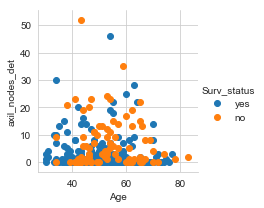

In [20]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='Surv_status').map(plt.scatter, 'Age', 'axil_nodes_det').add_legend()
plt.show()

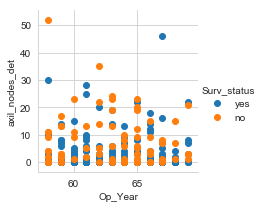

In [21]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='Surv_status').map(plt.scatter, 'Op_Year', 'axil_nodes_det').add_legend()
plt.show()

**Observation**
1. The correlation between the features is quiet trivial to determine using scatter plot.

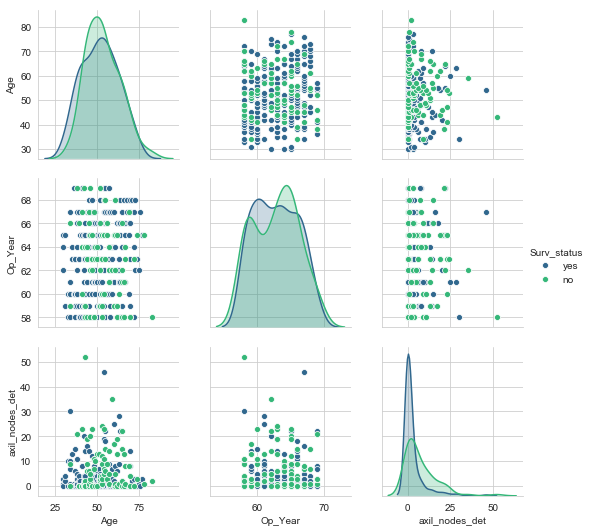

In [22]:
#Pair plot
sns.set_style('whitegrid')
sns.pairplot(haberman, hue='Surv_status', palette='viridis')

**Observation**
1. Even with Pair plot it's can be seen that most of the values in each plot is overlapping.
2. It's hard to distinguish the relevant features for classification of survival of the patients.

### Conclusion:
1. With numerous techniques of EDA, univariate and bivariate analysis of the features, it can be seen that the data points in the dataset is quiet ambiguous.
2. It can be concluded that either the data points are not sufficient or the entries in each feature is quiet varying due to which it's difficult to correlate the features.
3. Due to ambiguous values, it is difficult to find relevant features that can be used to build model for classification of survival of the patients.
4. Still some conclusions can be drawn through univariate analysis of Age and Operational Year features.
5. About 70% of patients up or about 60 years of age survived the surgery of cancer.
6. Most of the patients between 45-55 years of age survived post surgery for cancer.